Analysis on MAP Dataset:

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings as wr
import re
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from PIL import Image

In [3]:
wr.filterwarnings("ignore", category=DeprecationWarning)
chunk = pd.read_csv('dataset.csv',chunksize=1000000, low_memory=False)
data = pd.concat(chunk)
data.head()

,ID,State,Year,Homicide,Situation,VicAge,VicSex,VicRace,Weapon,Solved,Age Group,Active Range
0,197609001AL00400,Alabama,1976,Murder and non-negligent manslaughter,Single victim/unknown offender(s),30,Male,Black,Other or type unknown,No,18-30,1975-1984
1,197701001AL00400,Alabama,1977,Murder and non-negligent manslaughter,Single victim/single offender,65,Female,Black,Other or type unknown,Yes,<50,1975-1984
2,197703001AL00400,Alabama,1977,Murder and non-negligent manslaughter,Single victim/multiple offenders,48,Male,White,"Handgun - pistol, revolver, etc",Yes,31-50,1975-1984
3,197703001AL00401,Alabama,1977,Murder and non-negligent manslaughter,Single victim/single offender,27,Male,Black,Shotgun,Yes,18-30,1975-1984
4,197708001AL00400,Alabama,1977,Murder and non-negligent manslaughter,Single victim/single offender,17,Female,Black,Knife or cutting instrument,Yes,11-17,1975-1984


Text(0.5, 1.0, 'Solved and Unsolved Homicides from 1975-2022')

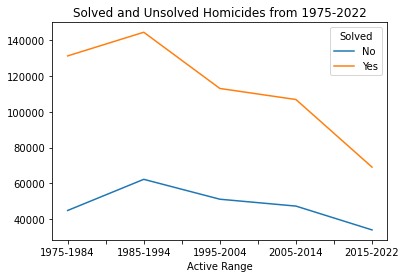

In [4]:
data.groupby('Active Range')['Solved']\
    .value_counts()\
    .unstack(level=1)\
    .plot.line()
plt.title('Solved and Unsolved Homicides from 1975-2022')

In [5]:
FPpattern_data= pd.read_csv('FPpattern.csv')
FPpattern_data.head()

,Support,State,Itemsets,Year,Latitude,Longitude
0,0.007221,California,"['White', '1985-1994', '18-30', 'Handgun - pis...",1985-1994,36.701463,-118.755997
1,0.006675,California,"['1995-2004', 'White', '18-30', 'Handgun - pis...",1995-2004,36.701463,-118.755997
2,0.005020,New York,"['1985-1994', '18-30', 'Handgun - pistol, revo...",1985-1994,40.712728,-74.006015
3,0.004496,California,"['1985-1994', '18-30', 'Handgun - pistol, revo...",1985-1994,36.701463,-118.755997
4,0.004493,California,"['White', '18-30', 'Handgun - pistol, revolver...",2005-2014,36.701463,-118.755997


Text(0.5, 1.0, 'Possible Serial Killing count per state from 1975-2022 ')

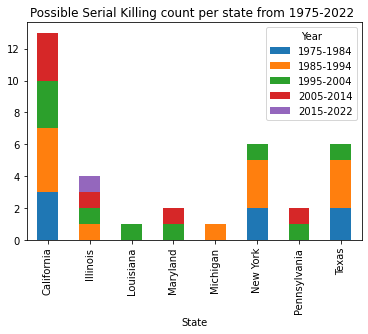

In [6]:
FPpattern_data.groupby('State')['Year']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
plt.title('Possible Serial Killing count per state from 1975-2022 ')


RADFord Analysis

In [7]:
chunks = pd.read_csv('Research_data.csv',chunksize=1000000, low_memory=False)
RadFord = pd.concat(chunks)
RadFord.head()

,Number,Name,Sex,Race,NumVics,Country,State,County,City,US,...,Previous Arrests,Kill Method,VicSex,# Male,# Female,Race of Victim,Actual Ages,LocKilling,YearFirst,YearFinal
0,SK04666,"Abdulkadir, Mohamed S.",1,2.0,2.0,US,NE,"Hall, Lancaster",Grand Island,1,...,NaN,"2, 4",1.0,2.0,0.0,7.0,"22, 24",NaN,2009.0,2011.0
1,SK02744,"Abernathy, Gerald Anderson",1,1.0,2.0,US,"NC, MD","Montgomery, Mecklenburg","Silver Spring, Charlotte",1,...,1.0,2,2.0,0.0,2.0,1.0,"20, 59","3, 5",1982.0,1993.0
2,SK00003,"Abner, Michael Andrew",1,1.0,3.0,US,KY,Pulaski,"Saline, Somerset, Eubank",1,...,1.0,"4, 5",3.0,1.0,2.0,1.0,"79, 80, 87",1,1983.0,2010.0
3,SK04374,"Abreu, Pablo",1,3.0,2.0,US,FL,Miami-Dade,"Medley, North Miami",1,...,1.0,2,1.0,2.0,0.0,7.0,"39, 46","3, 5, 8",1991.0,1992.0
4,SK00004,"Abuelazam, Elias",1,1.0,5.0,US,"MI, VA","Genesee, Loudon","Flint, Leesburg",1,...,0.0,4,1.0,5.0,0.0,2.0,"31, 43, 44, 49, 60",3,2009.0,2010.0


In [8]:
RadFord['Degree'].unique()

array([nan, 'GED', 'Diploma', "Master's", "Bachelor's", 'None',
       'GED (prison)', 'PhD', "Associate's (prison)", "Associate's",
       "Bachelor's (Prison)", 'GED - Prison', 'LPN', 'RN',
       'GED - Military', "Bachelor's - St. Johns",
       "Bachelor's - Southern Utah Univ", 'GED (Prison)', 'MD',
       "Bachelor's - San Francisco State Univ", 'J.D.',
       'Diploma (Prison)', 'Ph.D.', "Bachelor's - Shawnee College",
       'MA - Univ of Michigan', "Bachelor's - Michigan State",
       'Earned GED in prison after murders',
       'GED - Prison (prior to killing)',
       'G.E.D. from a community college', "Associate's (in prison)",
       'LVN', "Bachelor's - Univ of Maryland",
       "Bachelor's - William & Mary", "Bachelor's - Iowa State Univ",
       'GED (1978)', 'M.D.', "Bachelor's - Harvard",
       "Associate's Degree (in prison)"], dtype=object)

In [9]:
import re
RadFord = RadFord.replace(to_replace =".*Bachelor's.*", value = "Bachelor's", regex = True)
RadFord = RadFord.replace(to_replace =".*G[.]*E[.]*D.*", value = "GED", regex = True)
RadFord = RadFord.replace(to_replace =".*Diploma.*", value = "Diploma", regex = True)
RadFord = RadFord.replace(to_replace =".*Master's.*", value = "Master's", regex = True)
RadFord = RadFord.replace(to_replace =".*Associate's.*", value = "Associate's", regex = True)
RadFord = RadFord.replace(to_replace =".*Ph.D.*", value = "PhD", regex = True)
RadFord = RadFord.replace(to_replace =".*M.D.*", value = "MD", regex = True)
RadFord = RadFord.replace(to_replace =".*MA.*", value = "MA", regex = True)
RadFord = RadFord.replace({'None': 'Unknown'})
RadFord = RadFord.replace({np.NAN: 'Unknown'})
RadFord['Degree'].unique()

array(['Unknown', 'GED', 'Diploma', "Master's", "Bachelor's", 'PhD',
       "Associate's", 'LPN', 'RN', 'MD', 'J.D.', 'MA', 'LVN'],
      dtype=object)

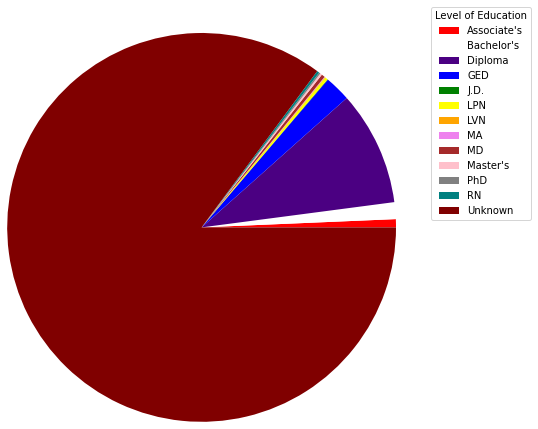

In [125]:
labels=sorted(RadFord['Degree'].unique())
size=[]
colors=['red','white','indigo','blue','green','yellow','orange','violet','brown','pink','grey','teal','maroon']
for label in labels:
    size.append(RadFord['Degree'].value_counts()[label])
pie=plt.pie(size,radius=2.5,colors=colors)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="lower right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure,title="Level of Education")
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.show()

In [11]:
RadFord['Aamodt Type'].unique()
RadFord = RadFord.replace(to_replace =".*Financial Gain.*", value = "Financial Gain", regex = True)
RadFord = RadFord.replace(to_replace =".*Enjoyment.*", value = "Enjoyment", regex = True)
RadFord = RadFord.replace(to_replace =".*Attention.*", value = "Attention", regex = True)
RadFord = RadFord.replace(to_replace =".*Avoid arrest.*", value = "Avoid Arrest", regex = True)
RadFord = RadFord.replace(to_replace =".*Anger.*", value = "Anger", regex = True)
RadFord = RadFord.replace(to_replace =".*Criminal.*", value = "Criminal", regex = True)
RadFord = RadFord.replace(to_replace =".*Mental [iI]llness.*", value = "Mental Illness", regex = True)
RadFord = RadFord.replace(to_replace =".*Drug [Ee]nterprise.*", value = "Drug Enterprise", regex = True)
RadFord = RadFord.replace(to_replace =".*Convenience.*", value = "Convenience", regex = True)
RadFord = RadFord.replace(to_replace =".*Cult.*", value = "Cult", regex = True)
RadFord = RadFord.replace(to_replace =".*Multiple [Mm]otives.*", value = "Cult", regex = True)
RadFord = RadFord.replace(to_replace =".*Gang.*", value = "Gang", regex = True)
RadFord = RadFord.replace({'None': 'Unknown'})
RadFord = RadFord.replace({np.NAN: 'Unknown'})
RadFord['Aamodt Type'].unique()

array(['Anger', 'Enjoyment', 'Financial Gain', 'Cult', 'Criminal',
       'Unknown', 'Avoid Arrest', 'Gang', 'Attention', 'Convenience',
       'Mental Illness', 'Drug Enterprise'], dtype=object)

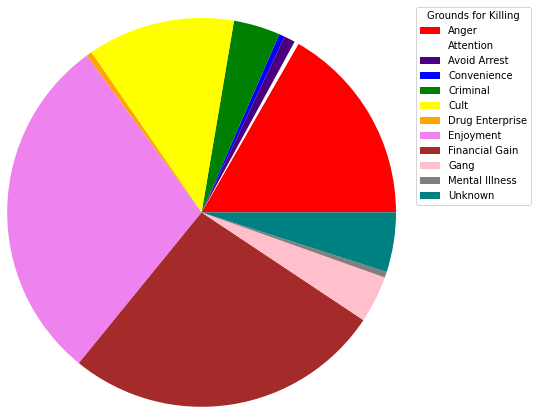

In [12]:

labels=sorted(RadFord['Aamodt Type'].unique())
size=[]
colors=['red','white','indigo','blue','green','yellow','orange','violet','brown','pink','grey','teal']
for label in labels:
    count=RadFord['Aamodt Type'].value_counts()[label]
    size.append(count)
pie=plt.pie(size,radius=2.5,colors=colors)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="lower right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure,title="Grounds for Killing")
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.show()

In [83]:
states=' '.join(FPpattern_data['State'].unique())
weapon=' '.join(data['Weapon'].unique())
sex=' '.join(data['VicSex'].unique())
Race=' '.join(data['VicRace'].unique())
Range=' '.join(data['Active Range'].unique())
purpose=' '.join(RadFord['Aamodt Type'].unique())
Names=' '.join(RadFord['Name'][:10].unique())

In [123]:
wordcloudtext=sex+" "+Race+" "+"Dennis Rader "+"Richard Ramirez "+"Jeffrey Dahmer "+"Ted Bundy "+"Gary Ridgway "+weapon+" "+Range+" "+purpose+" "+states
wordcloudtext

'Male Female Black White Asian American Indian or Alaskan Native Native Hawaiian or Pacific Islander Dennis Rader Richard Ramirez Jeffrey Dahmer Ted Bundy Gary Ridgway Other or type unknown Handgun - pistol, revolver, etc Shotgun Knife or cutting instrument Blunt object - hammer, club, etc Rifle Personal weapons, includes beating Firearm, type not stated Drowning Narcotics or drugs, sleeping pills Strangulation - hanging Fire Asphyxiation - includes death by gas Explosives Poison - does not include gas Pushed or thrown out window Other gun 1975-1984 1985-1994 1995-2004 2005-2014 2015-2022 Anger Enjoyment Financial Gain Cult Criminal Unknown Avoid Arrest Gang Attention Convenience Mental Illness Drug Enterprise California New York Texas Maryland Illinois Pennsylvania Michigan Louisiana'

In [116]:
stopwords = set(STOPWORDS)
extras=['etc','includes','Unknown','type','Other','stated','include','Other','Avoid']
for words in extras:
    stopwords.add(words)



In [15]:
mask = np.array(Image.open("usa3.jpg"))

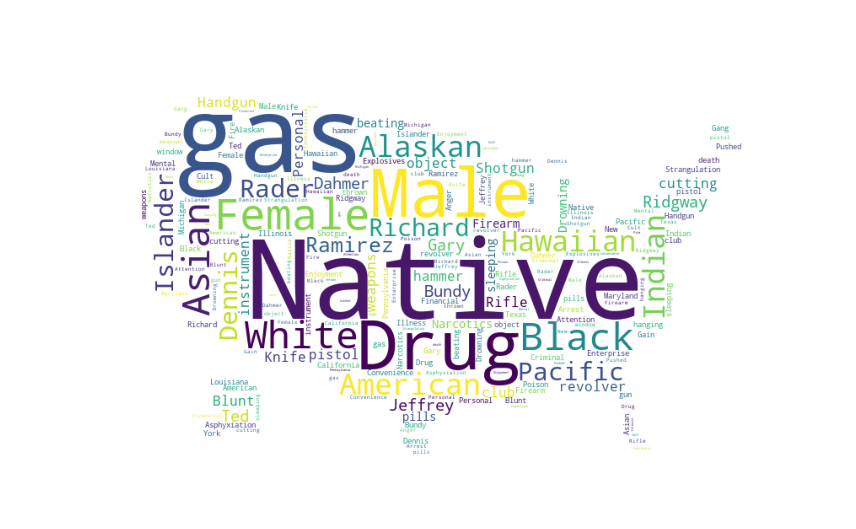

In [124]:
wordcloud = WordCloud(
 background_color="white",
    width = 1200, height = 1200,  # resolution
               #  colormap = 'bone',                  # font colors from palette
                stopwords = stopwords,              # remove common words
                normalize_plurals = True,           # plurals to singular
                repeat = True,                      # repeat words
                mask=mask,
                ).generate(wordcloudtext)


plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()